# Investigate a Dataset

## Dataset Used: _Titanic Data_
The [dataset](https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv) contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. A detailed description of the dataset can be found [here](https://www.kaggle.com/c/titanic/data).

## Description of data:  
<code>Variable	Definition	    Key
survival	Survival	    0 = No, 1 = Yes
pclass	  Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	     Sex	
Age	     Age in years	
sibsp	   # of siblings / spouses aboard the Titanic	
parch	   # of parents / children aboard the Titanic	
ticket	  Ticket number	
fare	    Passenger fare	
cabin	   Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.
</code>

## Objectives
Using the dataset provided, we aim to answer the following questions:
 1. What factors made people more likely to survive?
 2. How accurately can we make prediction on survival based on the features in hand?
 
## Data Wrangling
### Overview

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

titanic = pd.read_csv('titanic-data.csv') # Import data from .csv file 
titanic.head(10) # Preview the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
titanic.dtypes # Check the data types for each column

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [3]:
titanic.describe() # Check data types for each column

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic = titanic.drop(['PassengerId', 'Name', 'Ticket'],axis = 1) # Dropping unnecessary columns
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [5]:
# Create Survival Label Column
titanic['Survival'] = titanic.Survived.map({0 : 'Died', 1 : 'Survived'})
# Create Pclass Label Column
titanic['Class'] = titanic.Pclass.map({1 : 'First Class', 2 : 'Second Class', 3 : 'Third Class'})

### Explore Missing Data and Filling Them

In [6]:
for column in titanic.columns:
    if any(pd.isnull(titanic[column])): # Print out columns with missing data
        print column
        print titanic[pd.isnull(titanic[column])]

Age
     Survived  Pclass     Sex  Age  SibSp  Parch      Fare  Cabin Embarked  \
5           0       3    male  NaN      0      0    8.4583    NaN        Q   
17          1       2    male  NaN      0      0   13.0000    NaN        S   
19          1       3  female  NaN      0      0    7.2250    NaN        C   
26          0       3    male  NaN      0      0    7.2250    NaN        C   
28          1       3  female  NaN      0      0    7.8792    NaN        Q   
29          0       3    male  NaN      0      0    7.8958    NaN        S   
31          1       1  female  NaN      1      0  146.5208    B78        C   
32          1       3  female  NaN      0      0    7.7500    NaN        Q   
36          1       3    male  NaN      0      0    7.2292    NaN        C   
42          0       3    male  NaN      0      0    7.8958    NaN        C   
45          0       3    male  NaN      0      0    8.0500    NaN        S   
46          0       3    male  NaN      1      0   15.5000  

Using the above code, we can see that some data are missing in the __Age__, __Cabin__ and __Embarked__ feature. In total, there are  
* 177 __Age__, 
* 687 __Cabin__ 
* 2 __Embarked__

data missing.
In the following, we are going to explore the distribution of other features for the missing data point and decide on the methodology to fill them or to simply remove them.

#### Age
Firt, for rows with age data, we will take a look at what is the relationship between features like pclass(socio-economic status), SibSp/Parch (family size) and age. Instead of using two columns SibSp/Parch seperately, we will add a new column 'Family' to the dataframe for evaluating of family size and survival.

In [7]:
titanic['Family'] = titanic['Parch'] + titanic['SibSp']
titanic[pd.notnull(titanic['Age'])].groupby('Family')['Age'].mean()

Family
0    32.220297
1    31.391511
2    26.035806
3    18.274815
4    20.818182
5    18.409091
6    15.166667
7    15.666667
Name: Age, dtype: float64

In [8]:
titanic[pd.notnull(titanic['Age'])].groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [9]:
titanic[pd.notnull(titanic['Age'])].groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [10]:
titanic[pd.notnull(titanic['Age'])].corr()['Age']

Survived   -0.077221
Pclass     -0.369226
Age         1.000000
SibSp      -0.308247
Parch      -0.189119
Fare        0.096067
Family     -0.301914
Name: Age, dtype: float64

From the above tests, we can see clearly that the average age decreases as the family size increases and socio-economic status decreases. Males onboard tend to be older than females. Using these relationship, I think it is a good idea to fill the missing age data using an OLS regression.

In [11]:
import statsmodels.formula.api as sm
res = sm.ols(formula="Age ~ Sex + Family + Pclass", data=titanic).fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     68.38
Date:                Sun, 26 Mar 2017   Prob (F-statistic):           7.47e-39
Time:                        14:29:30   Log-Likelihood:                -2832.7
No. Observations:                 714   AIC:                             5673.
Df Residuals:                     710   BIC:                             5692.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      44.5803      1.476     30.209      

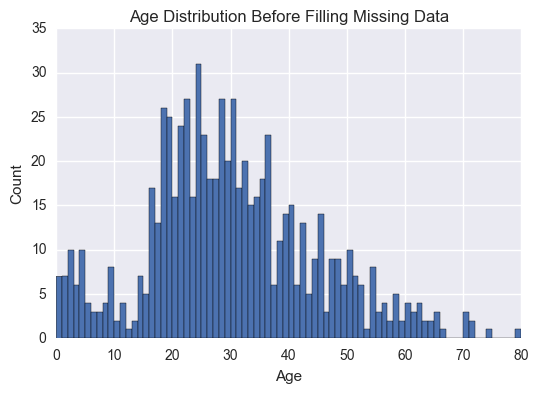

In [12]:
titanic['Age'].hist(bins=range(int(min(titanic['Age'])), int(max(titanic['Age'])) + 1, 1))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution Before Filling Missing Data')

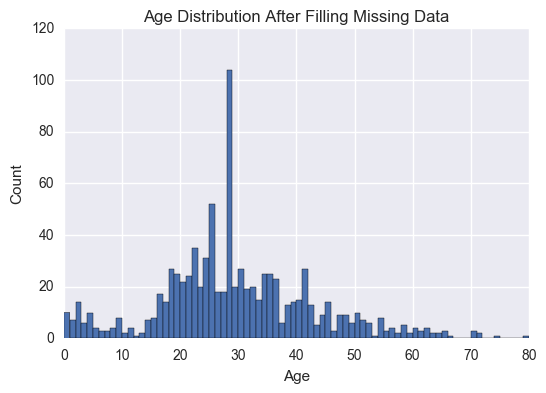

In [13]:
pred = res.predict(titanic[pd.isnull(titanic['Age'])])
pred = pred.apply(int)
titanic['Age'].fillna(pred,inplace = True)
titanic['Age'].hist(bins=range(int(min(titanic['Age'])), int(max(titanic['Age'])) + 1, 1))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution After Filling Missing Data')

From the above histograms for before and after filling, we can see that our method strongly favoured to fill na's with values around the mean, which resulted a peak at 29yrs old.

#### Cabin
We will take a quick look at the difference for features between passengers with and without cabin data.

In [14]:
titanic[pd.notnull(titanic['Cabin'])].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.666667,1.196078,35.948137,0.441176,0.436275,76.141504,0.877451
std,0.472564,0.525961,15.031135,0.628918,0.729976,74.391749,1.082636
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,29.453125,0.000000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,55.220850,1.000000
75%,1.000000,1.000000,47.000000,1.000000,1.000000,89.328150,1.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200,5.000000


In [15]:
titanic[pd.isnull(titanic['Cabin'])].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family
count,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000
mean,0.299854,2.639010,27.334425,0.547307,0.365357,19.157325,0.912664
std,0.458528,0.589602,12.354845,1.207492,0.827106,28.663343,1.740765
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.877100,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,10.500000,0.000000
75%,1.000000,3.000000,33.000000,1.000000,0.000000,23.000000,1.000000
max,1.000000,3.000000,74.000000,8.000000,6.000000,512.329200,10.000000


In the above summary statistics, we can see that most passenger has missing cabin data because they are paying a low fare. I think this mostly makes sense as cheaper tickets tend not to be assigned to a specific cabin. Therefore, as the cabin information is already mostly covered by the fare feature, we can remove it.


In [16]:
titanic = titanic.drop('Cabin',axis = 1)

#### Embarked
Since there are only two embarked data missing, we will explore the statistics for each port and use a more discretionary way to fill these two.

In [17]:
titanic[pd.notnull(titanic['Embarked'])].groupby(['Embarked']).describe()

Age      Family        Fare       Parch      Pclass  \
Embarked                                                                     
C        count  168.000000  168.000000  168.000000  168.000000  168.000000   
         mean    30.618571    0.750000   59.954144    0.363095    1.886905   
         std     13.928887    0.926974   83.912994    0.660481    0.944100   
         min      0.420000    0.000000    4.012500    0.000000    1.000000   
         25%     22.000000    0.000000   13.697950    0.000000    1.000000   
         50%     28.000000    0.000000   29.700000    0.000000    1.000000   
         75%     39.000000    1.000000   78.500025    1.000000    3.000000   
         max     71.000000    4.000000  512.329200    3.000000    3.000000   
Q        count   77.000000   77.000000   77.000000   77.000000   77.000000   
         mean    26.668831    0.597403   13.276030    0.168831    2.909091   
         std     10.313701    1.310481   14.188047    0.656999    0.369274   
         min      2.000000    0.000000    6.750000    0.000000    1.000000   
         25%     23.000000    0.000000    7.750000    0.000000    3.000000   
         50%     25.000000    0.000000    7.750000    0.000000    3.000000   
         75%     28.000000    1.000000   15.500000    0.000000    3.000000   
         max     70.500000    5.000000   90.000000    5.000000    3.000000   
S        count  644.000000  644.000000  644.000000  644.000000  644.000000   
         mean    29.215450    0.984472   27.079812    0.413043    2.350932   
         std     13.649041    1.774997   35.887993    0.853253    0.789402   
         min      0.000000    0.000000    0.000000    0.000000    1.000000   
         25%     21.000000    0.000000    8.050000    0.000000    2.000000   
         50%     28.000000    0.000000   13.000000    0.000000    3.000000   
         75%     36.125000    1.000000   27.900000    0.000000    3.000000   
         max     80.000000   10.000000  263.000000    6.000000    3.000000   

                     SibSp    Survived  
Embarked                                
C        count  168.000000  168.000000  
         mean     0.386905    0.553571  
         std      0.557213    0.498608  
         min      0.000000    0.000000  
         25%      0.000000    0.000000  
         50%      0.000000    1.000000  
         75%      1.000000    1.000000  
         max      2.000000    1.000000  
Q        count   77.000000   77.000000  
         mean     0.428571    0.389610  
         std      0.979105    0.490860  
         min      0.000000    0.000000  
         25%      0.000000    0.000000  
         50%      0.000000    0.000000  
         75%      0.000000    1.000000  
         max      4.000000    1.000000  
S        count  644.000000  644.000000  
         mean     0.571429    0.336957  
         std      1.216600    0.473037  
         min      0.000000    0.000000  
         25%      0.000000    0.000000  
         50%      0.000000    0.000000  
         75%      1.000000    1.000000  
         max      8.000000    1.000000

Using the above description, we can see that most people embarked at **S**. **C** has the highest average fare and socio-economic status. Since both of the missing data paid a high fare (80) and has a high socia-economic status, we assign both of them to **C**.

In [18]:
titanic['Embarked'].fillna('C',inplace = True)

## Exploration
### What factors made people more likely to survive?
In the data wrangling phase, we have already built up some intuition on the data. We will be exploring several interesting idea here:
1. Does socio-economic status impact the survival rate?
2. Does a more expensive ticket help you survive?
3. Do families survive or die together?

#### Does socio-economic status impact the survival rate?
We will first do a bar chart for the survival rate of people from different socio-economic status?

In [19]:
survival_pclass = titanic.groupby(['Class','Sex'], as_index=False)['Survived']

In [20]:
survival_pclass.describe()

count      mean       std  min  25%  50%  75%  max
Class        Sex                                                       
First Class  female   94.0  0.968085  0.176716  0.0  1.0  1.0  1.0  1.0
             male    122.0  0.368852  0.484484  0.0  0.0  0.0  1.0  1.0
Second Class female   76.0  0.921053  0.271448  0.0  1.0  1.0  1.0  1.0
             male    108.0  0.157407  0.365882  0.0  0.0  0.0  0.0  1.0
Third Class  female  144.0  0.500000  0.501745  0.0  0.0  0.5  1.0  1.0
             male    347.0  0.135447  0.342694  0.0  0.0  0.0  0.0  1.0

In [21]:
survival_pclass.mean()

,Class,Sex,Survived
0,First Class,female,0.968085
1,First Class,male,0.368852
2,Second Class,female,0.921053
3,Second Class,male,0.157407
4,Third Class,female,0.500000
5,Third Class,male,0.135447


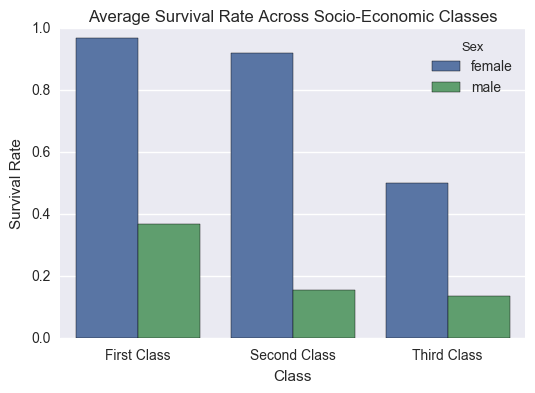

In [22]:
survival_pclass_mean = survival_pclass.mean()
sns.barplot(x='Class', y='Survived', hue = 'Sex', data=survival_pclass_mean, order=['First Class','Second Class','Third Class'])
plt.title('Average Survival Rate Across Socio-Economic Classes')
plt.ylabel('Survival Rate')

From the above statistics, we can see that females with higher socio-economic status (1/2) has high probability (>90%) of survival. This probability is followed by females of the lowest socio-economic status (~50%) and males of the highest socio-economic status (~37%).

#### Does a more expensive ticket help you survive?
First, we will look up the correlation between **Fare** and **Pclass**.

In [23]:
titanic.corr()['Fare']['Pclass']

-0.54949961994390606

We can see there is a strong negative correlation between **Fare** and **Pclass**, which says that people of higher socio-economic class buys more expensive tickets. Therefore, we are curious about whether it's the ticket or the class that makes you survive. Let's start by defining expensive tickets for the poors as the 75th percentile of ticket price and cheap tickets for the richs as the 25th percentile of fares paid.

In [24]:
titanic.groupby('Class')['Fare'].describe()

Class              
First Class   count    216.000000
              mean      84.154687
              std       78.380373
              min        0.000000
              25%       30.923950
              50%       60.287500
              75%       93.500000
              max      512.329200
Second Class  count    184.000000
              mean      20.662183
              std       13.417399
              min        0.000000
              25%       13.000000
              50%       14.250000
              75%       26.000000
              max       73.500000
Third Class   count    491.000000
              mean      13.675550
              std       11.778142
              min        0.000000
              25%        7.750000
              50%        8.050000
              75%       15.500000
              max       69.550000
Name: Fare, dtype: float64

In [25]:
print 'Rich but cheap:',titanic.query('Pclass == 1 & Fare < 31')['Survived'].mean()
print 'Rich and expensive:',titanic.query('Pclass == 1 & Fare >= 31')['Survived'].mean()
print 'Poor and cheap:',titanic.query('Pclass == 3 & Fare < 15.5')['Survived'].mean()
print 'Poor but expensive:',titanic.query('Pclass == 3 & Fare >= 15.5')['Survived'].mean()

Rich but cheap: 0.462962962963
Rich and expensive: 0.685185185185
Poor and cheap: 0.225895316804
Poor but expensive: 0.2890625


Using the above analysis, we can see that rich people who bought the cheaper tickets have a lower rate of survival than the rest. Poor people who bought the more expensive tickets have a higher rate of survival than the rest. Let's produce a scatter plot to demonstrate the relationship between fare and survival rate.

In [26]:
survival_rate = []
total_count = []
low_price = range(0,int(max(titanic['Fare'])),5)
for low in low_price:
    high = low + 5
    sample = titanic[(titanic['Fare'] >= low) & (titanic['Fare'] < high)]['Survived']
    survival_rate.append(sample.mean())
    total_count.append(sample.count())

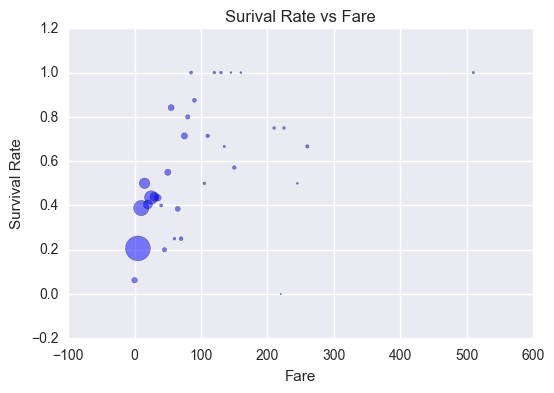

In [27]:
import matplotlib.pyplot as plt
plt.scatter(list(low_price),survival_rate,s=total_count,alpha = 0.5)
plt.xlabel('Fare')
plt.ylabel('Survival Rate')
plt.title('Surival Rate vs Fare')

As we can see, there is a clear upward trend between the fare paid and the rate of survival. A more expensive ticket does in fact increase your chance of survival.

#### Do families survive or die together?
To answer this question, we will explore the relationship between the number of family members on board and rate of survival.

In [28]:
survival_family = titanic.groupby(['Family'])['Survived']

In [29]:
survival_family.describe()

Family       
0       count    537.000000
        mean       0.303538
        std        0.460214
        min        0.000000
        25%        0.000000
        50%        0.000000
        75%        1.000000
        max        1.000000
1       count    161.000000
        mean       0.552795
        std        0.498756
        min        0.000000
        25%        0.000000
        50%        1.000000
        75%        1.000000
        max        1.000000
2       count    102.000000
        mean       0.578431
        std        0.496249
        min        0.000000
        25%        0.000000
        50%        1.000000
        75%        1.000000
        max        1.000000
3       count     29.000000
        mean       0.724138
        std        0.454859
        min        0.000000
        25%        0.000000
        50%        1.000000
                    ...    
5       std        0.351250
        min        0.000000
        25%        0.000000
        50%        0.000000
      

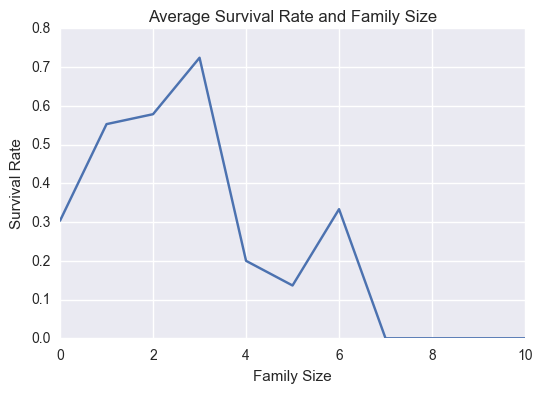

In [30]:
plt.plot(survival_family.mean())
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.title('Average Survival Rate and Family Size')

Using the above plot, we can clearly see that your survival rate increases as the number of family member you are travelling increases at first, up to 3. Then, a larger family size you are travelling with can actually cause you to die together. I suspect this is mainly because of males are allowed to be on the boats if they have a family. Therefore, we are going to look at how the survival rate varies by sex.

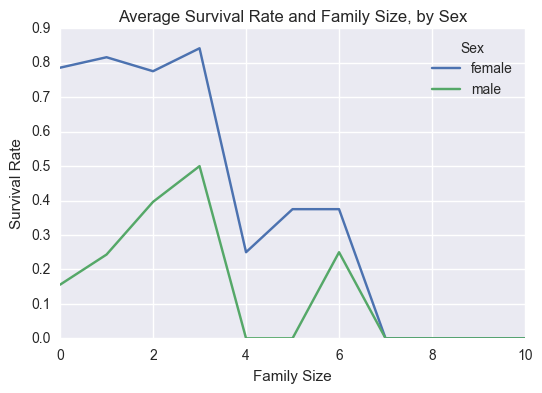

In [31]:
plt.figure()
titanic.groupby(['Family','Sex'])['Survived'].mean().unstack().plot()
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.title('Average Survival Rate and Family Size, by Sex')

As we can see, as the number of family members onboard increases upto 3, the survival rate of the male member also increases.

### How accurately can we make prediction on survival based on the features in hand?
Now, we are going to try to use the data we have to see if we can correctly predict whether a person has survived the disaster. First, we are going to convert categorical features into numerical ones.
#### Preprocessing Data

In [32]:
from sklearn import preprocessing

# Transform Categorical Data for Learning
titanic = titanic.apply(preprocessing.LabelEncoder().fit_transform)

# Preparing data
titanic_label = titanic['Survived']
titanic_train = titanic.drop(['Survived','Class','Survival'], axis = 1)

#### Cross-Validation
After we have processed our data, we are going to test which classifier can most accurately predict the chances of survival using a 10-fold cross-validation. The score is given as the average percentage of correct predictions.

In [33]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score

# Gaussian Native Bayes
nb = GaussianNB()
score = cross_val_score(nb, titanic_train, titanic_label, scoring='accuracy',cv=10) 
print 'GaussianNB score:', score.mean()

# SVM
svc = SVC()
score = cross_val_score(svc, titanic_train, titanic_label, scoring='accuracy',cv=10) 
print 'Support Vector Machine score:', score.mean()

# Random Forests
rf = RandomForestClassifier(n_estimators=100)
score = cross_val_score(rf, titanic_train, titanic_label, scoring='accuracy',cv=10) 
print 'Random Forests:', score.mean()

# Logistic Regression
logreg = LogisticRegression()
score = cross_val_score(logreg, titanic_train, titanic_label, scoring='accuracy',cv=10) 
print 'Logistic Regression:', score.mean()

# knn
knn = KNeighborsClassifier(n_neighbors=3)
score = cross_val_score(knn, titanic_train, titanic_label, scoring='accuracy',cv=10) 
print 'knn:', score.mean()

GaussianNB score: 0.772317557598
Support Vector Machine score: 0.682364657814
Random Forests: 0.817175122007
Logistic Regression: 0.795800703666
knn: 0.694811882874


As we can see from the scores, Random forests and logistic regression has the best performance among other classifiers. Without much feature engineering, we can already achieve ~80% prediction accuracy.

## Conclusion

In our study, we have successfully answered some of the questions we had. In particular, we have reached the following conclusions:

1. Your socio-economic status is highly correlated to your odds of survival. This is especially true for males, where males from pclass 1 has more than doubled probability of survival than the rest two classes. For women from the higher classes, the distinction is less obvious, as most of the will be rescued. However, women from pclass 3 has a much lower probability of survival.

2. How much you paid for your ticket is also highly correlated to your odds of survival. As we've seen in our previous comparison, passengers from pclass 1 who bought the 25% cheapest tickets from their class has a ~20% less probability of survival. Passengers from pclass 3 who bought the 25% most expensive tickets from their class has a ~6% more probability of survival. Therefore, even though socio-economic status and fare are highly correlated, there is still new information revealed by the fare.

3. People travelling alone and large families have a lower probability of survival then families of 2,3 and 4 people. My hypothesis is that families are often allowed to be on the boat together when the size is reasonable. Therefore, there are higher rate of survival for males with families. Therefore, actually having more family members onboard will help you survive if you are a male.

4. We have done some interesting exploration in how accurately we can predict a person's probability of survival and has achieved about 80% accuracy using random forest in a 10-fold cross-validation.

### Limitations
It is worthwhile to note that our exploration has certain limitations:

1. Our conclusion is reached purely based on statistical summaries and graphical illustrations. No statistical test has been performed. Therefore, most of the information and trend we have discovered are purely _correlation_. They do not imply _causation_.

2. We have started with a dataset of many missing values. To make full use of the dataset, we have decided to fill in some missing data, namely their age and the port they embarked. The method that we used to fill in our data can impact our analysis, especially for the prediction part. As we have seen, after filling in the data, our distribution of age has changed, which may not be desirable. Each method of filling in data has its own pros and cons, and we may as well drop these rows.